In [1]:
import numpy as np
import sys
import math

# Algoritmos "Divide y Vencerás"

## 2.1 Introducción

Los pasos de estos algoritmos son los siguientes:

 * **División** (_divide_): se divide, recursivamente, el problema en una serie de subproblemas _**disjuntos**_ (más sobre esto en la próxima unidad) que son instancias más pequeñas del el mismo problema.
 * **Resolución** (_conquer_): se resuelve cuando el tamaño del problema es lo suficientemente pequeño como para hacerlo de manera sencilla (caso base)
 * **Combinación** (_combine_): combinar las soluciones de los subproblemas más pequeños para generar la solución de los subproblemas previos hasta llegar a la solcuión del problema original.
 
Otros conceptos clave:
 * **Caso recursivo**: casos en los que los subproblemas son demasiado grandes como para resolverlos de manera sencilla e inmediata.
 * **Caso base**: subproblema tan pequeño que puede ser resuelto de manera inmediata.
 
 Prestar especial atención al paso de combinación, ya que este suele ser el principal desafío a la hora de diseñar estos algoritmos. En los algoritmos D&C más simples este paso no está presente, como es el caso de la **búsqueda binaria**.

### Adivinar un número

Un genio nos pide que adivinemos el número del 0 al 99 que está pensando, y sus únicas respuestas posibles son "incorrecto" y "correcto".
Probablemente necesitemos varios intentos antes de acertar. Cuántos exactamente? 
Bueno, éste número es una variable aleatoria, puede tomar diversos valores, del 1 al 100. Ahora, analicemos estos intentos como operaciones. Un análisis del caso promedio diría que el número de intentos esperado es de 50, pero el análisis que llevamos a cabo en esta materia es el del peor caso, así que el número de operaciones esperadas (intentos de adivinar), será de 100; en el peor caso diremos todos los números del 0 al 99 y sólo hallaremos el correcto al final de la enumeración.

Variemos este ejemplo. Ahora, en vez de responder "incorrecto" o "correcto", el genio responderá "más alto" o "más bajo" si el número correcto es más alto o más bajo, respectivamente, que el número arriesgado.
Esto cambia todo, ahora está dando más información y esta información se puede usar para reducir el número de operaciones (intentos). Ya que el día de mañana, quizás tengamos que averiguar un número que está dentro de 0 y 999, o 0 y 9999, etc... Es decir, nos preocupa el comportamiento asintótico.

Entonces, detengamos el video y pensemos una estrategia para hallar el número correcto con el menor número de operaciones posibles.

Buscamos maximizar la información obtenida con cada intento. Por ejemplo, si nuestro primer intento fuera "90" y obtuvieramos la respuesta "más arriba", descartaríamos 91 posibles números con 1 solo intento. Esto es muy deseable, pero se acerca más a un análisis del mejor caso que del peor. Si queremos maximizar los números descartados con cada intento incorrecto, debemos arriesgar el número intermedio del intervalo a adivinar. Entonces, si el intervalo es de 0 a 99, arriesgaremos 49 o 50, y nos aseguraremos descartar la mitad del intervalo, no importa que suceda. Si, por ejemplo, el número correcto fuera 88 los pasos serían los siguientes:

 1. Intervalo entre 0 y 99. Adivinamos: 50
 2. "más arriba"
 3. Intervalo entre 51 y 99. Adivinamos: 75
 4. "más arriba"
 5. Intervalo entre 76 y 99. Adivinamos: 86
 6. "más arriba"
 7. Intervalo entre 87 y 99. Adivinamos: 93
 8. "más abajo"
 9. Intervalo entre 87 y 94. Adivinamos: 90
 10. "más abajo"
 11. Intervalo entre 87 y 90. Adivinamos: 88
 12. "correcto"
 
 Y así, con 6 intentos, hemos llegado al número correcto. 6 intentos para adivinar un número del 0 al 99, no está nada mal (de hecho ya veremos que estuvimos muy cerca del peor caso). Pero esto fue posible gracias a que el genio decidió aportar más información, respondiendo "más abajo" o "más arriba", cuando adivinamos el número incorrecto.

Todo esto para decir que la diferencia entre un genio que responde "si" o "no" y uno que responde "más abajo" o "más arriba", es la diferencia entre una búsqueda de un número en una lista desordenada y una ordenada. En la búsqueda en una lista desordenada no tenemos más alternativa que comparar el número que buscamos frente a todos los números de la lista, en cambio, si sabemos que la lista está ordenada, podemos aplicar la técnica recién vista. Este tipo de búsqueda se llama binaria ---por dividir la lista en 2 mitades---, y es uno de los algoritmos de D&C más simples.

##### **A continuación, veremos una poosible implementación de este algoritmo. Pero primero, pausen el video e intenten implentarlo en pseudocódigo**

------------

## 2.2 Búsqueda binaria

In [2]:
## Acá, búsqueda binaria!

In [3]:
def bb_1(lista, valor, offset):
    if(len(lista) > 0):
        medio = len(lista) // 2

        if (valor < lista[medio]):
            return bb_1(lista[0:medio], valor, offset)
        elif (valor > lista[medio]):
            return bb_1(lista[medio+1:], valor, medio + offset + 1)
        else:
            return medio + offset
    else:
        return -1

In [4]:
def bb_2(lista, valor, izq, der):
    if(der > izq):
        medio = izq + (der - izq) // 2

        if (valor < lista[medio]):
            return bb_2(lista, valor, 0, medio)
        elif (valor > lista[medio]):
            return bb_2(lista, valor, medio+1, der)
        else:
            return medio
    else:
        return -1

In [5]:
# Mis inputs
lista = list(range(0, 100, 2))
valor = 41

# Tupla de salidas
(bb_1(lista, valor, 0), bb_2(lista, valor, 0, len(lista)))

(-1, -1)

Ahora, si dividir la lista en 2 mitades nos permitió descartar el 50%, por qué no hacerlo en tercios? Eso nos permitiría descartar el 66% de la lista en cada intento! Cómo sería el pseudocódigo de esta función? Pausen el video y dense la oportunidad de resolverlo.

In [6]:
## Acá, búsqueda ternaria!

In [7]:
def bb_t(lista, valor, izq, der):
    if(der > izq):
        medio_izq = izq + (der - izq) // 3
        medio_der = medio_izq + (der - izq) // 3

        if (valor < lista[medio_izq]):
            return bb_t(lista, valor, 0, medio_izq)
        elif (valor > lista[medio_der]):
            return bb_t(lista, valor, medio_der+1, der)
        elif (valor == lista[medio_izq]):
            return medio_izq
        elif (valor == lista[medio_der]):
            return medio_der
        else:
            return bb_t(lista, valor, medio_izq+1, medio_der)
    else:
        return -1

In [8]:
# Mis inputs
lista = list(range(0, 100, 2))
valor = 2

# Tupla de salidas
(bb_t(lista, valor, 0, len(lista)), bb_2(lista, valor, 0, len(lista)))

(1, 1)

Cabe aclarar que existe una variación de la búsqueda ternaria donde, al igual que en la búsqueda binaria, se hace una única comparación y luego se descarta 1 tercio del arreglo, en el peor caso, o 2 tercios del arreglo, en el mejor caso.

Y por qué detenernos ahí? En cuartos nos permitiría descartar el 75% de la lista en 1 sola llamada recursiva, y así podríamos seguir hasta dividir la lista en tantas partes como elementos tenga. Sería la búsqueda n-aria. Eso nos permitiría encontrar el número buscado en 1 sola llamada! Debería ser lo más óptimo, no?

Bueno, si hicieramos eso, nuestra función de búsqueda se convertiría en una función de búsqueda desordenada común y corriente. La función se ejecutaría 1 sola vez, si, pero en esa ejecución haría tantas comparaciones como elementos tenga la lista, en el peor caso. Justamente lo que queríamos evitar.

Entonces, como puede ser que llevando al límite nuestro concepto de "obtener la mayor información posible con cada llamada recursiva", nos haya llevado de vuelta a donde empezamos? Bueno, esto nos pasa por no ser lo suficientemente rigurosos, así que a partir de ahora hablaremos en términos de complejidades algorítmicas y veremos si esa formalidad resuelve esta aparente contradicción

--------------

## 2.3 Recurrencias

Utilizando la notación de complejidad ya aprendida, la complejidad de la búsqueda _naive_ (en una lista desordenada) correspondería a una complejidad de $O(n)$, ya que compararíamos, uno por uno, todos los elementos. Cuál sería la complejidad de la búsqueda binaria?

In [9]:
def bb_2(lista, valor, izq, der):
    if(der > izq):                                         # O(1)
        medio = izq + (der - izq) // 2                     # O(1)

        if (valor < lista[medio]):                         # O(1)
            return bb_2(lista, valor, 0, medio)            # Todo lo anterior con una lista de la mitad de tamaño?
        elif (valor > lista[medio]):                       # O(1)
            return bb_2(lista, valor, medio+1, der)        # Todo lo anterior con una lista de la mitad de tamaño?
        else:
            return medio
    else:
        return -1

Nuestro problema es la recursividad. Hasta ahora no habíamos analizado funciones recursivas. Si el tiempo de ejecución de un llamado de esta función es $f(n)$, siendo $n$ el tamaño de la lista de entrada, el tiempo final sería algo así:

$$ f(n) + f(n/2) + f(n/4) + f(n/8) + ... $$

Esta sumatoria sigue hasta que termine por que el tamaño de lista donde buscar es 0 (de nuevo, análisis de peor caso, asumimos que o no encontraremos nuestro valor, o lo encontraremos en la última iteración). Para especificar mejor esta complejidad, usamos a las recurrencias.

Las recurrencias son un conjunto de ecuaciones y/o inecuaciones que describen una función en términos de sus entradas más pequeñas

Veamos la recurrencia de la búsqueda binaria

$$ T(n) = 
 \begin{cases}
\Theta(1), \qquad \qquad \quad  \text{if} \ n == 1
\newline
T(\frac{n}{2}) + \Theta(1), \qquad \ \text{if} \ n > 1
\end{cases} $$

Decimos que ésta fórmula es abierta, ya que la recurrencia depende de si misma. Como vimos, la sumatoria sigue y, en principio, no podemos acotarla.

Veamos más funciones y sus correspondientes recurrencias, para familiarizarnos un poco más con ellas.

Para cada una de ellas, intentá escribir su recurrencia.

In [10]:
def funcion_recursiva_1(n): # `n` es un escalar
    if n > 0:
        print(n, end = ' ')
        funcion_recursiva_1(n-1)

In [11]:
funcion_recursiva_1(16)

16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

$$ T(n) = 
 \begin{cases}
\Theta(1), \qquad \qquad \quad  \text{if} \ n == 0
\newline
T(n-1) + 1, \qquad \ \text{if} \ n > 0
\end{cases} $$

$$ \Theta(n) $$

In [12]:
def funcion_recursiva_2(n): # `n` es un escalar
    if n > 0:
        i = 1
        while i <= n:
            print(i, end = ' ')
            i = i + 1
        print("")
        funcion_recursiva_2(n-1)

In [13]:
funcion_recursiva_2(16)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 
1 2 3 4 5 6 7 8 9 10 11 12 13 
1 2 3 4 5 6 7 8 9 10 11 12 
1 2 3 4 5 6 7 8 9 10 11 
1 2 3 4 5 6 7 8 9 10 
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 
1 2 3 4 5 6 7 
1 2 3 4 5 6 
1 2 3 4 5 
1 2 3 4 
1 2 3 
1 2 
1 


$$ T(n) = 
 \begin{cases}
\Theta(1), \qquad \qquad \quad  \text{if} \ n == 0
\newline
T(n-1) + n, \qquad \ \text{if} \ n > 0
\end{cases} $$

$$ \Theta(\frac{n(n - 1)}{2}) \longrightarrow  \Theta(n^{2}) $$

In [14]:
def funcion_recursiva_3(n): # `n` es un escalar
    if n > 0:
        i = 2
        while i <= n:
            print(i, end = ' ')
            i = i * 2
        print("")
        funcion_recursiva_3(n-1)

In [15]:
funcion_recursiva_3(16)

funcion_recursiva_3(15)

2 4 8 16 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 
2 4 
2 4 
2 4 
2 
2 

2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 8 
2 4 
2 4 
2 4 
2 4 
2 
2 



$$ T(n) = 
 \begin{cases}
\Theta(1), \qquad \qquad \quad  \text{if} \ n == 0
\newline
T(n-1) + \lfloor \log n \rfloor, \qquad \ \text{if} \ n > 0
\end{cases} $$

$$ \Theta(n \log{n}) $$

En esta ocasión agregamos el símbolo de redondeo para abajo, pero en el futuro nos lo ahorraremos.

Habiéndonos familiarizado con la noción de recurrencias, pasemos ahora a acotarlas.

Como logramos eso? A qué familia de funciones corresponde, por ejemplo, la recurrencia de búsqueda binaria? $O(n)$? $O(n^{2})$? 

Bueno, si bien asustan un poco, éstas no son más que series (ya vistas en la clase anterior), y son series acotadas. Es decir, convergen a algún valor, en caso de que $n$ sea una constante conocida. o si $n$ es una variable no acotada (el caso que nos interesa), convergen a una función, o al menos, pueden ser acotadas por esa función.

Cormen detalla 3 métodos p/ resolver recurrencias:
 * **sustitución**: adivinar y comprobar.
 * **árbol de recurrencias**: dibujar el árbol p/ adivinar.
 * **método maestro (maestrulli)**: a esta nos dedicaremos.
 
 Los primeros 2 métodos deberán consultarlos del Cormen. Aquí ahondaremos en el tercero, el método maestro.

------------------------------------------------------------------------------------------

## 2.4 Método maestro

El método maestro provee reglas para obtener una fórmula cerrada para las recurrencias del tipo:

$$ T(n) = aT(\frac{n}{b}) + f(n) $$

donde $a \geq 1$ y $b \geq 1$ son constantes.

Empecemos por entender el tipo de recurrencia que estamos resolviendo.

Si ésta proviene de un algoritmo de D&C, el primer término está dado por el número de llamadas recursivas que hace ($a$) y por el tamaño de de la entrada que cada una recibe ($b$). Por ej., en nuestra búsqueda binaria, cada vez que la función se ejecutaba, se llamaba a si misma una única vez ($a = 1$) y al hacerlo dividía a la lista a la mitad ($b = 2$). Es decir, una mitad es descartada. El mismo análisis concluye que para la búsqueda ternaria: $a = 1$ y $b = 3$.

El segundo término $ f(n) $ corresponderá, en nuestros algoritmos de D&C, a las etapas de división y recombinación del problema. Éstas son las operaciones cuya complejidad no está abierta, ya que no contienen llamadas recursivas. Siguiendo con los ejemplos de las búsquedas binaria y ternaria, en ambos casos $f(n)$ equivale a una constante ya que ambas consumen 1 OP en dividir a la lista y si bien la búsqueda ternaria tiene más comparaciones que la binaria, la diferencia entre ambas es una constante, así que $f(n) = O(1)$

Continuando con el método, éste dice que podremos hallar una fórmula cerrada para estas recurrencias cuando se cumpla alguno de los siguientes 3 casos:

1. si $f(n) = O(n^{\log_{b}a - \epsilon}) \ $, entonces:    $\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \ \ \ \ $ $ T(n) = \Theta(n^{\log_{b}a})$
2. si $f(n) = \Theta(n^{\log_{b}a}) \ $, entonces:  $\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \ \ $ $ T(n) = \Theta(n^{\log_{b}a} \log n)$
3. si $f(n) = \Omega(n^{\log_{b}a + \epsilon}) \ $, y si: $a f(\frac{n}{b}) = c f(n) $ para alguna constante $c>1$ entonces: $\quad T(n) = \Theta(f(n))$


Donde $\epsilon \gt 0$ es una constante

En todos los casos estamos comparando la complejidad "no recursiva" con la función $n^{\log_{b}a}$, que proviene de la complejidad "recursiva". Es decir, que el método maestro divide en 2 partes las operaciones de un algoritmo recursivo y luego se fija que parte domina a la otra. En el primer caso, la parte recursiva domina **polinomialmente** (ya veremos que es esto), a la no-recursiva, en el 3er caso sucede lo opuesto y en el 2do caso ninguna domina a la otra y aun así el método maestro es capaz de acotar por arriba y por abajo la complejidad de nuestra recurrencia.

La acotación polinomial se da por la constante $\epsilon$, que al ser mayor a 0, aumenta la exigencia en los casos 1 y 2. Es decir, en el caso 1, no alcanza con que la complejidad recursiva acote por arriba a la no-recursiva, sino que debe hacerlo con un margen. Asimismo, para que se cumpla el 3er caso, la parte no-recursiva debe acotar por arriba a la parte recursiva, más el mismo margen. Ese margen es $n^{\epsilon}$

Por último, el 3er caso requiere una segunda condición, llamada condición de regularidad. Ésta condición suele cumplirse.

Nótese que el requisito de dominación polinomial, es decir, la existencia de la constante $\epsilon$ implica que no todas las recurrencias del tipo $ T(n) = aT(\frac{n}{b}) + f(n) $ podrán ser resueltas. Habrá complejidades recursivas que dominarán a la complejidad no-recursivas, pero que no lo harán polinomialmente, es decir, no tienen un margen de $n^{\epsilon}$. Asimismo, habrá complejidades no-recursivas que dominarán a la complejidad recursiva, pero que tampoco lo hacen polinomialmente. Éstas recurrencias caen en los _gaps_ del método maestro y deberán ser resueltas con otro método, si se quiere obtener la fórmula cerrada.

<img src="maestrulli.png" alt="mm" style="width: 800px;"/>

Entonces, los 3 casos en donde el método maestro no aplica:

1. La recurrencia no es de la forma $ T(n) = aT(\frac{n}{b}) + f(n) $. Ej: la recurrencia ejemplo ya vista: $T(n-1) + 1$
2. No aplican ninguno de los 3 casos. Ninguna parte (recursiva y no-recursiva) domina a la otra, ni son equivalentes.
3. Aplica el 3er caso, pero la complejidad no-recursiva no cumple el criterio de regularidad.

------------------

## 2.5 Complejidad de la búsqueda binaria por método maestro

Empezamos sustituyendo las variables $a$, $b$ y complejidad no recursiva $f(n)$:
    
$$ T(n) = T(\frac{n}{2}) + O(1)$$


#### 1er caso

$$ O(1) \ ?=? \ O(n^{\log_{2}1 - \epsilon})  $$

$$ O(1) \ ?=? \ O(n^{0 - \epsilon})  $$

Elijo por conveniencia $\epsilon = 0.001$:

$$ O(1) \ \neq \ O(n^{-0.001})  $$

Ahora deberíamos resolver esto utilizando las desigualdades que vimos en la unidad anterior, pero ya sabemos que esto no se va a cumplir. 
$n$ tiene un exponente negativo, así que se irá achicando a medida que n aumente, no importa que tan pequeño sea el $\epsilon$ que elija, asintóticamente, la función $n^{-\epsilon}$ tenderá a 0, si $\epsilon \gt 0$, condición requerida por el método maestro.

#### 2do caso

$$ \Theta(1) \ ?=? \ \Theta(n^{\log_{2}1})  $$

$$ \Theta(1) \ ?=? \ \Theta(n^{0})  $$


$$ \Theta(1) \ = \ \Theta(1)  $$

Aplica el 2do caso. Entonces, la complejidad de la búsqueda binaria es:

$$ T(n) = \Theta(n^{\log_{2}1} \log n) $$
$$ T(n) = \Theta(\log n) $$

#### 3er caso

Esto no es necesario.

$$ O(1) \ ?=? \ \Omega(n^{\log_{2}1 + \epsilon})  $$

$$ O(1) \ ?=? \ \Omega(n^{0 + \epsilon})  $$

Elijo por conveniencia $\epsilon = 0.001$:

$$ O(1) \ \neq \ \Omega(n^{0.001})  $$

Una constante jamás acotaría por arriba a una variable que esté elevada a un exponente positivo, por más bajo que este sea.

Ahora estamos en condiciones de responder la pregunta anterior, que conviene más, la búsqueda binaria o la ternaria? 

Aplicando el método maestro a la búsqueda ternaria, vemos que $a = 1$, $b = 3$ y $f(n) = O(1)$, es decir, $b$ es el único que cambia, ya que si bien hay más comparaciones, lo que impactaría en $f(n)$, este cambio no es relevante ya que el número de operaciones sigue siendo constante. Queda como ejercicio aplicar el método maestro y obtener la fórmula cerrada para la complejidad de la búsqueda ternaria. Se verá que es idéntica a la de búsqueda binaria.

Y esto nos lleva a la complejidad de la búsqueda n-aria. En este caso no podríamos aplicar el método maestro, ya que la recurrencia no es el tipo de recurrencias al que aplica. Estaríamos dividiendo a la lista en $b=n$ partes, no haríamos ninguna llamada recursiva $a = 0$ y habría tantas comparaciones como elementos $f(n) = n$:

$$ T(n) = 0 T(\frac{n}{n}) + n $$
$$ T(n) = n $$

Es decir, esto no es una recurrencia, por que no hay llamadas recursivas. Esto es una simple búsqueda desordenada iterativa. 

Ésta búsqueda iterativa podría hacerse recursiva:
comparando el número `valor` con 1 elemento de la `lista` y descartándolo de la siguiente llamada recursiva cuando estos no sean iguales.

In [16]:
def búsqueda_desordenada_recursiva(lista, valor, offset): # `n` es un escalar
    if len(lista) == 0
        return -1
    else if lista[0] != valor:
        búsqueda_desordenada_recursiva(lista[1:], valor, offset + 1)
    else
        return offset

SyntaxError: invalid syntax (2926991905.py, line 2)

La recurrencia no sería del tipo de recurrencias que resuelve el método maestro:

$$ T(n) = T(n-1) + 1 $$

Pero no lo necesitamos para ver que `búsqueda_desordenada_recursiva()` se ejecuta $n$ veces y realiza un número constante de operaciones cada vez que lo hace, por lo que la fórmula cerrada de su complejidad es $O(n)$, al igual que la versión iterativa.

Volvamos por última vez a la diferencia entre la búsqueda n-aria y las búsquedas binarias, ternarias, cuaternarias, etc., con el objetivo de seguir naturalizando la noción de comportamiento asintótico.

Las búsquedas que dividen a la lista de entrada en un número constante de segmentos terminan teniendo la misma complejidad por esa misma razón, por su comportamiento constante. La búsqueda 1000-aria, la que divide a la lista en 1000 segmentos, tiene la misma complejidad que la binaria $O(\log n)$, pero en el momento en que el número de segmentos en los que se divide la lista ---y consecuentemente, el número de operaciones de comparación---, pasa a depender del largo de la lista ($n$), la complejidad pasa a ser $O(n)$ y estamos ante una búsqueda desordenada común. La búsqueda 1000-aria se podría aplicar a una lista de, digamos, 500 elementos y terminaría resultando en la misma cantidad de operaciones que la búsqueda desordenada, pero aun así sus complejidades difieren. Por que la noción de complejidad es un concepto teórico que se ocupa del comportamiento asintótico, es decir, de $n$ creciente.

Entonces, si la búsqueda binaria es superior. Por qué no es la única utilizada?
Porque requiere que la lista de input esté ordenada y para eso, salvo que tengamos suerte, hay que ordenarla

------------------------------------------------------------------------------------------

## 2.6 _Merge sort_

En la unidad anterior vimos un algoritmo de ordenamiento, `insertion_sort()`, que tenía una complejidad de $O(n^{2})$. Ahora veremos un algoritmo D&C de _sort_ con un tiempo de ejecución más bajo.

_merge sort_ utiliza los pasos típicos de D&C:

 - **división**: Divide la lista de $n$ elementos en dos sublistas de $\frac{n}{2}$ elementos.
 - **resolución**: ordena las dos sublistas recursivamente llamándose a si mismo.
 - **combinación**: cuando obtiene dos sublistas ordenadas de $\frac{n}{2}$, las combina para producir una lista ordenada de $n$.
 
El caso base se da cuando una sublista llega al tamaño $n = 1$, punto en el cual simplemente devuelve la sublista. Se entiende que toda lista de $n = 1$ está ordenada.

Inmediatamente después viene el paso clave, el de combinación. Este paso aprovecha que las secuencias a combinar ya están ordenadas internamente y las ordena en $O(n)$. Ya veremos una justificación para este tiempo de ejecución. Veamos primero la función de `merge sort()`:

In [ ]:
def merge_sort(lista):
    if len(lista) > 1:
        med = len(lista) // 2
        lista_izq = merge_sort(lista[:med])
        lista_der = merge_sort(lista[med:])
        lista = merge(lista_izq, lista_der)
    return lista

<img src="merge_sort_1.png" alt="merge_sort_1" style="width: 400px;"/>

El caso base se cumple cuando `len(lista) == 1`. 

Si nos situamos en la instancia de `merge_sort()` q llamó a 2 casos base, el siguiente paso es llamar a `merge()`, que conformará una lista ordenada de 2 elementos a partir de 2 listas ordenadas de 1 elemento. 
Es fácil suponer como `merge()` haría esto, si `lista[izq] >= lista[der]`, entonces conformaría la nueva lista como `[ lista[izq], lista[der] ] `; en cambio, si `lista[izq] < lista[der]`, la nueva lista sería: `[ lista[der], lista[izq] ] `.
Pero que pasaría en la siguiente combinación? Ahora `merge()` estaría lidiando con 2 listas de 2 elementos cada una.

Veamos como funciona `merge()` exactamente.

In [ ]:
def merge(lista_izq, lista_der):
    lista = []
    lista_izq.append(sys.maxsize)
    lista_der.append(sys.maxsize)
    
    while len(lista_izq) > 1 or len(lista_der) > 1:
        if lista_izq[0] > lista_der[0]:
            lista.append(lista_der.pop(0))
        else:
            lista.append(lista_izq.pop(0))
    return lista

<img src="merge_sort_2.png" alt="merge_sort_2" style="width: 600px;"/>

Comprobemos que efectivamente funciona

In [ ]:
v = [ 2, 2, -1, 99, 56, 5, 6, 2, 1, 0, 7, 18, 2, 2, 0]
ordenada = merge_sort(v)
ordenada

[-1, 0, 0, 1, 2, 2, 2, 2, 2, 5, 6, 7, 18, 56, 99]

#### Sobre la longitud de la secuencia original

No es casualidad que el ejemplo anterior sea con una lista de 8 elementos. Si $n$ es potencia de 2, entonces `merge()` recibirá siempre secuencias de longitud idéntica. El caso usual es que `merge()` esté juntando sublistas de distintos tamaños, lo cual no representa ningún problema, siempre y cuando esté bien implementado.

<img src="merge_sort_3.png" alt="merge_sort_3" style="width: 600px;"/>

---------------------------

## 2.7 Tarea: subarray máximo

Como la programación no garpa, el genio de la búsqueda binaria ahora promete revelarte los futuros precios de las acciones de una empresa que cotiza en bolsa (que bien!),
esa empresa es YPF, así que decidís empezar a invertir en la bolsa argentina (que mal).
Como buen _trader_, tu objetivo es maximizar tu ganancia comprando barato y vendiendo caro.
Dada una lista de precios diarios como la que figura de ejemplo, podés comprar en cualquier día (salvo el último, duh), y luego vender en un día posterior.

Diseñar un algoritmo D&C que resuelva este problema y que se llame como figura en el ejemplo, con los argumentos auxiliares que considere necesarios.
El cuestionario del campus te va a pedir que pegues tu(s) función(es).

In [17]:
precios = [630, 708, 690, 540, 660, 642, 546, 408, 516, 636, 594, 666, 636, 504, 594, 570, 612]

# subarray_maximo(precios, args...)

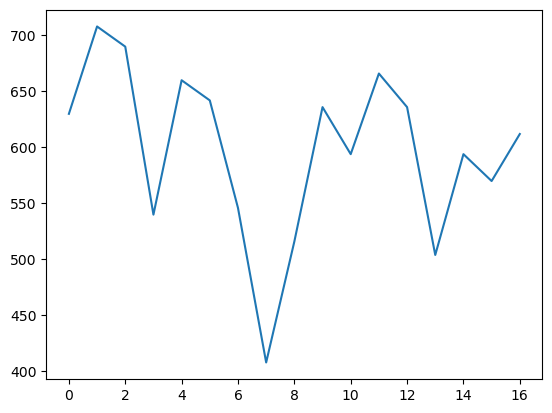

In [18]:
import matplotlib.pyplot as plt
plt.plot(precios)

In [19]:
import sys

def cruzado(diffs, i, medio, j):
    suma_izq = -sys.maxsize
    idx_izq = 0
    suma = 0
    for idx in range(medio, i-1, -1):
        suma += diffs[idx]
        if suma > suma_izq:
            suma_izq = suma
            idx_izq = idx
    suma_der = -sys.maxsize
    idx_der = 0
    suma = 0
    for idx in range(medio+1, j+1):
        suma += diffs[idx]
        if suma > suma_der:
            suma_der = suma
            idx_der = idx

    # print(f"{i=}, {medio=}, {j=} --- {idx_izq=}, {idx_der=}, {(suma_izq+suma_der)=}")

    return idx_izq, idx_der, suma_izq+suma_der


def max_subarray(diffs, i, j):
    if i == j:
        return i, j, diffs[j]
    
    medio = (i+j) // 2
    i_compra, i_venta, i_gain = max_subarray(diffs, i, medio)
    j_compra, j_venta, j_gain = max_subarray(diffs, medio+1, j)
    ij_compra, ij_venta, ij_gain = cruzado(diffs, i, medio, j)
    
    compra = venta = gain = 0
    if i_gain >= j_gain:
        if i_gain >= ij_gain:
            compra, venta, gain = i_compra, i_venta, i_gain
        else:
            compra, venta, gain = ij_compra, j_venta, ij_gain
    elif j_gain >= ij_gain:
        compra, venta, gain = j_compra, j_venta, j_gain
    else:
        compra, venta, gain = ij_compra, j_venta, ij_gain
    
    # print(f"{i=} -- {j=} -- {compra=} -- {venta=} {gain=}")

    return compra, venta, gain

precios = [630, 708, 690, 540, 660, 642, 546, 408, 516, 636, 594, 666, 636, 504, 594, 570, 612]
diffs = [ j-i for i,j in zip(precios[:-1], precios[1:]) ]
i, j, gain = max_subarray(diffs, 0, len(diffs)-1)

print(f"{i=}, {j=}, {gain=}")
precios[i:j+2], precios[j+1]-precios[i]

i=7, j=10, gain=258


([408, 516, 636, 594, 666], 258)

Recuerden usar pseudocódigo y si tienen alguna duda sobre que se considera pseudocódigo, vean los ejemplos del Cormen o también pueden consultarnos.

-------------------

## 2.8 Conclusión

* Pasos de D&C: **división**, **resolución** y **combinación**.
* **recurrencias**, **caso recursivo**, **caso base**
* **sustitución**, **arbol recursivo**, **método maestro**
* **búsqueda binaria**
* **merge sort**
* Recuerden leer el Cormen: **p(30-37)**, **p(65-74)** y **p(83-96)**
* Resolver el _subarray_ máximo.

--------------------

### Contenidos a explicar durante la práctica

1. complejidad de merge sort
2. quicksort

## Extra

Hasta 2017, Clang implementaba su std::sort con quicksort recursivo!:

https://www.youtube.com/watch?v=Lcz0ZHewkHs